In [1]:
__author__ = '@T. Sánchez-Pastor'
__date__ = '31/05/21'
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

[Yue Chen et. al (2020) PRA]

$$ \frac{1}{a_{3D}} =  - \frac{1}{2\sqrt{\pi}}\int^{\infty}_0 d\beta\left[ e^{\beta E} \sqrt{\frac{\eta_x \eta_z}{\sinh(\eta_x \beta) \sinh(\eta_z \beta) \sinh(\beta)}} - \beta^{-3/2}\right]$$

In [18]:
E = 5/2 # hbar*w
B = np.linspace(0, 10, num=200)
t = np.linspace(0, 10, num=200)
eta_x = 1
eta_z = 1

In [19]:
def integrand_2020(E, B, eta_x, eta_z):
    return -np.exp(B*E)/(np.sqrt(2*np.pi)) * np.sqrt(eta_x*eta_z/\
            (np.sinh(B) * np.sinh(eta_x*B) * np.sinh(eta_z*B))) - B**(-3/2)

In [20]:
Yue_Chen = integrand_2020(E, B, eta_x, eta_z)

<ipython-input-19-d419733068fe>:2: RuntimeWarning: divide by zero encountered in true_divide
  return -np.exp(B*E)/(np.sqrt(2*np.pi)) * np.sqrt(eta_x*eta_z/\
<ipython-input-19-d419733068fe>:3: RuntimeWarning: divide by zero encountered in power
  (np.sinh(B) * np.sinh(eta_x*B) * np.sinh(eta_z*B))) - B**(-3/2)


[J.Liang and C.Zhang Phys. Scr. 77, 025302 (2008)]

$$ \frac{1}{a_{3D}} =  - \frac{1}{2\sqrt{\pi}}\int^{\infty}_0 dt \left[ e^{\epsilon t/2} \sqrt{\frac{\eta_x \eta_z}{(1 - e^{-\eta_x t}) (1 - e^{-\eta_z t}) (1 - e^{-t})}} - t^{-3/2}\right]$$

with $\epsilon = E - E_0$

In [32]:
def integrand_2008(E, t, eta_x, eta_z):
    eps = E - 1/2*(1 + eta_x + eta_z)
    return -np.exp(eps*t/2)/(2*np.sqrt(np.pi)) * np.sqrt(eta_x*eta_z/ \
            ((1 - np.exp(-t)) * (1 - np.exp(-eta_x*t)) * (1 - np.exp(-eta_z*t)))) - (t)**(-3/2)

In [33]:
Zhang = integrand_2008(E, B, eta_x, eta_z)

<ipython-input-32-e6fca4778cb5>:3: RuntimeWarning: divide by zero encountered in true_divide
  return -np.exp(eps*t/2)/(2*np.sqrt(np.pi)) * np.sqrt(eta_x*eta_z/ \
<ipython-input-32-e6fca4778cb5>:4: RuntimeWarning: divide by zero encountered in power
  ((1 - np.exp(-t)) * (1 - np.exp(-eta_x*t)) * (1 - np.exp(-eta_z*t)))) - (t)**(-3/2)


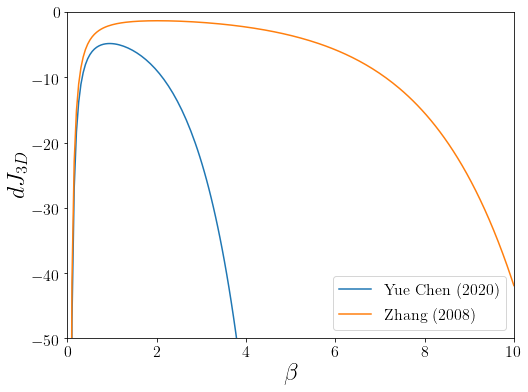

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(B, Yue_Chen, '-', label='Yue Chen (2020)')
ax.plot(B, Zhang, '-', label='Zhang (2008)')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$dJ_{3D}$')
ax.set_ylim(-50, 0)
ax.set_xlim(0, 10)
plt.legend()